**Assignment Part 1**

Flow chart of progress:

1. We need to make a function that takes in the parameters n, h, H, and the formula for the prior (normalized to 1) and spits out the desired probability.
2. We need to make a function that takes in an n value and spits out random number of heads and tails to act as our data sets for testing the function from part 1. 
3. We need to produce data sets of varying n values to put into our function.
4. We need to make a list of priors to apply to our formulas for each data set to check their effect on our probability.
5. We need to create a linspace for H between 0 and 1 to plug into our function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#from mpl_toolkits.mplot3d.axes3d import get_test_data
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcol

**Assignment Part 1**


As given in the problem, 

$$ prob(D \ \vert \ H, \ I) = \frac{n!}{h!(n-h)!} H^h (1-H)^{n-h}$$ 

and from the background info in the set, we know that, replacing X with H, we have

$$prob(H \  \vert \  D, \ I) = \frac{prob(D \ \vert \ H, \ I) \times prob(H \ \vert \ I)}{prob(D \ \vert \ I)}$$

So plugging the first into the second, we get:

$$prob(H \ \vert \ D, \ I) = \frac{n!  \ H^h (1-H)^{n-h} \times prob(H  \ \vert \ I)}{h!(n-h)! \times prob(D \  \vert \ I)}$$

The prior, $prob(H  \ \vert \ I)$ is something we're going to assume is either gaussian or constant, while the normalization/evidence, $prob(D \  \vert \ I)$ is just a normalization we can apply later. Therefore, I will remove the evidence and replace the prior with a constant (called P) or a gaussian.

With these replacements/removals, our formula is simply:

$$prob(H \ \vert \ D, \ I) = \frac{n!  \ H^h (1-H)^{n-h}}{h!(n-h)!} \times P$$

for the constant prior case and 

$$prob(H \ \vert \ D, \ I) = \frac{n!  \ H^h (1-H)^{n-h}}{h!(n-h)!} \times e^{-\frac{1}{2} \big( \frac{H-\mu}{\sigma} \big)^2}$$

for the gaussian prior case.

If the prior is constant, though, it will be essentially irrelevant after the probability has been normalized, so we can exclude it from our function for the uniform case.

In [2]:
Harray = np.linspace(0,1,1000) #creating array of H values to plot against and plug into distribution

narray = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def coinprob(n, trueH, H): #uniform case
    
    h = np.random.binomial(n,trueH)
    
    factorials = np.math.factorial(n) / (np.math.factorial(h) * np.math.factorial(n-h))
    exponentials = H**h * (1-H)**(n-h)
    
    prob = factorials * exponentials
    
    norm = np.trapz(prob, H)
    
    normprob = prob / norm
    
    return(normprob)
    
    
def gcoinprob(n, trueH, H, u, s): #gaussian case
    
    h = np.random.binomial(n,trueH)
    
    factorials = np.math.factorial(n) / (np.math.factorial(h) * np.math.factorial(n-h))
    exponentials = H**h * (1-H)**(n-h)
    prior = np.exp(-0.5 * ((H-u)/s)**2)
    
    prob = prior * factorials * exponentials
    
    norm = np.trapz(prob, H)
    
    normprob = prob / norm
    
    return(normprob)

In [3]:
cointest = coinprob(narray[5], 0.5, Harray)
#print(cointest)
cointest2 = coinprob(narray[7], 0.5, Harray)

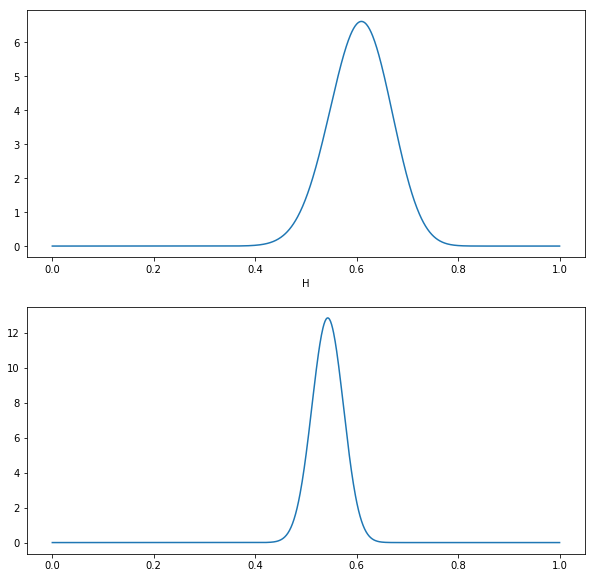

In [4]:
cointestfig = plt.figure(figsize = (10,10))
cointestfig.subplots_adjust(hspace = 0.2, wspace = 0.2)

cointestax = cointestfig.add_subplot(2,1,1)
cointestax.plot(Harray, cointest)
cointestax.set_xlabel("H")

cointestax2 = cointestfig.add_subplot(2,1,2)
cointestax2.plot(Harray, cointest2)


Okay, we've tested that our plotting works and our function spits out the probability curve. Now to go through the different variations in conditions as described by the set.

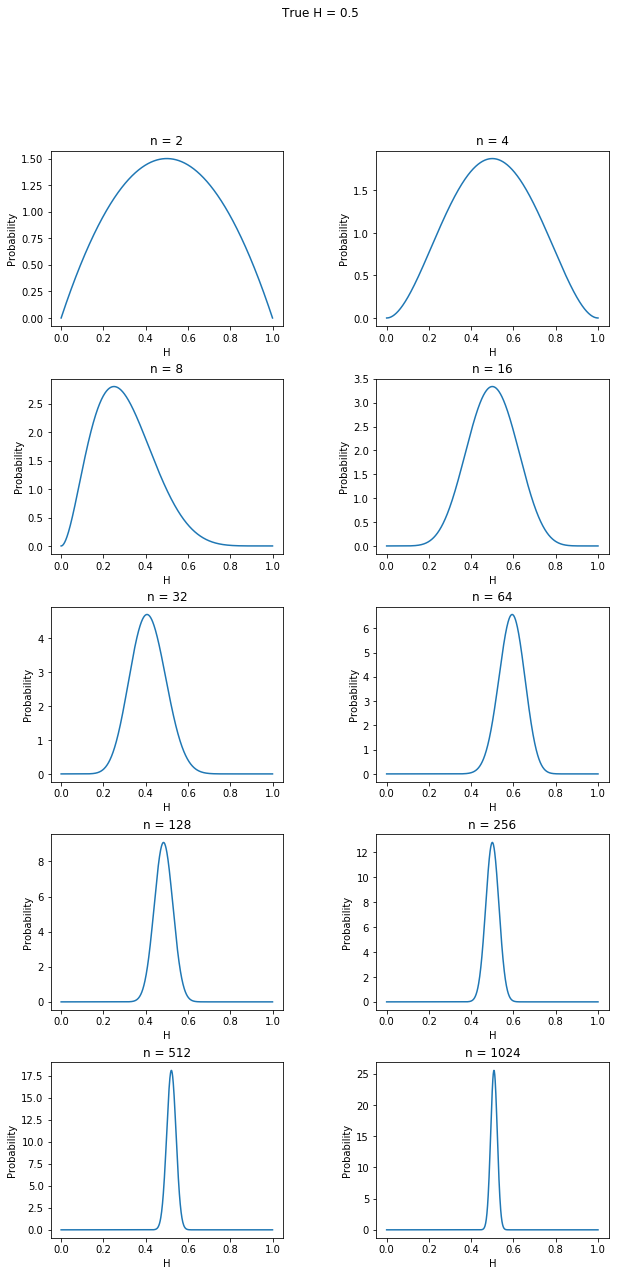

In [5]:
ucoinfig50 = plt.figure(figsize = (10,20))
ucoinfig50.subplots_adjust(hspace = 0.3, wspace = 0.4)
ucoinfig50.suptitle("True H = 0.5")

for i,x in enumerate(narray):
    prob = coinprob(x, 0.5, Harray)
    ax = ucoinfig50.add_subplot(5,2,i+1)
    ax.plot(Harray, prob)
    ax.set_xlabel("H")
    ax.set_ylabel("Probability")
    ax.set_title("n = " + str(x))


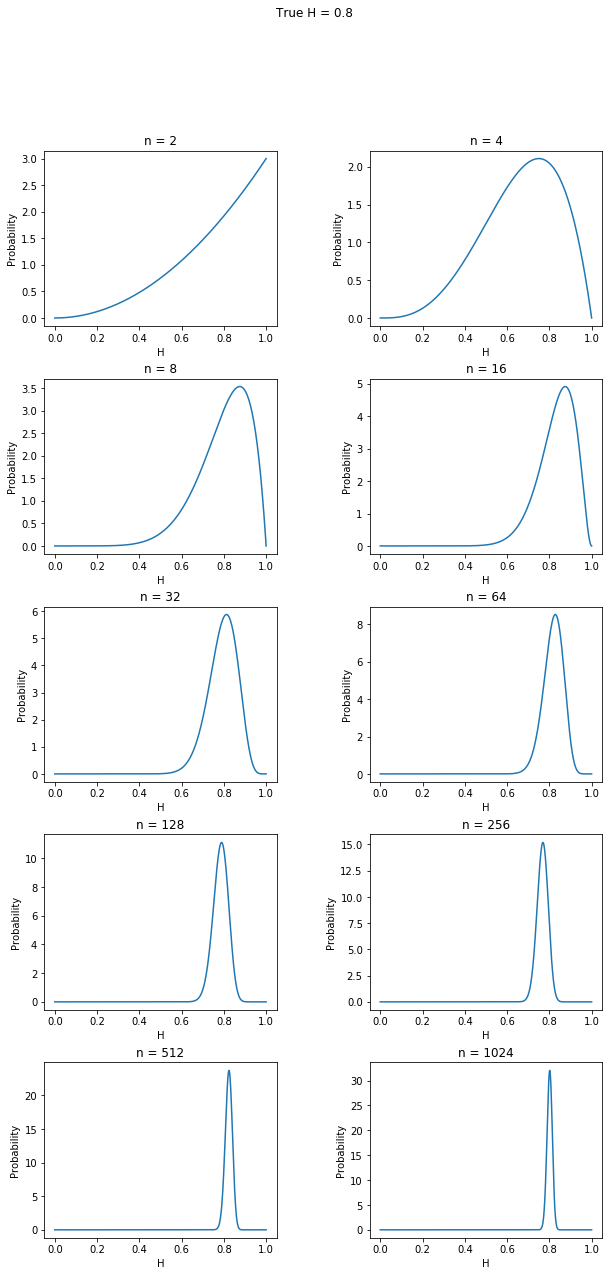

In [6]:
ucoinfig80 = plt.figure(figsize = (10,20))
ucoinfig80.subplots_adjust(hspace = 0.3, wspace = 0.4)
ucoinfig80.suptitle("True H = 0.8")

for i,x in enumerate(narray):
    prob = coinprob(x, 0.8, Harray)
    ax = ucoinfig80.add_subplot(5,2,i+1)
    ax.plot(Harray, prob)
    ax.set_xlabel("H")
    ax.set_ylabel("Probability")
    ax.set_title("n = " + str(x))

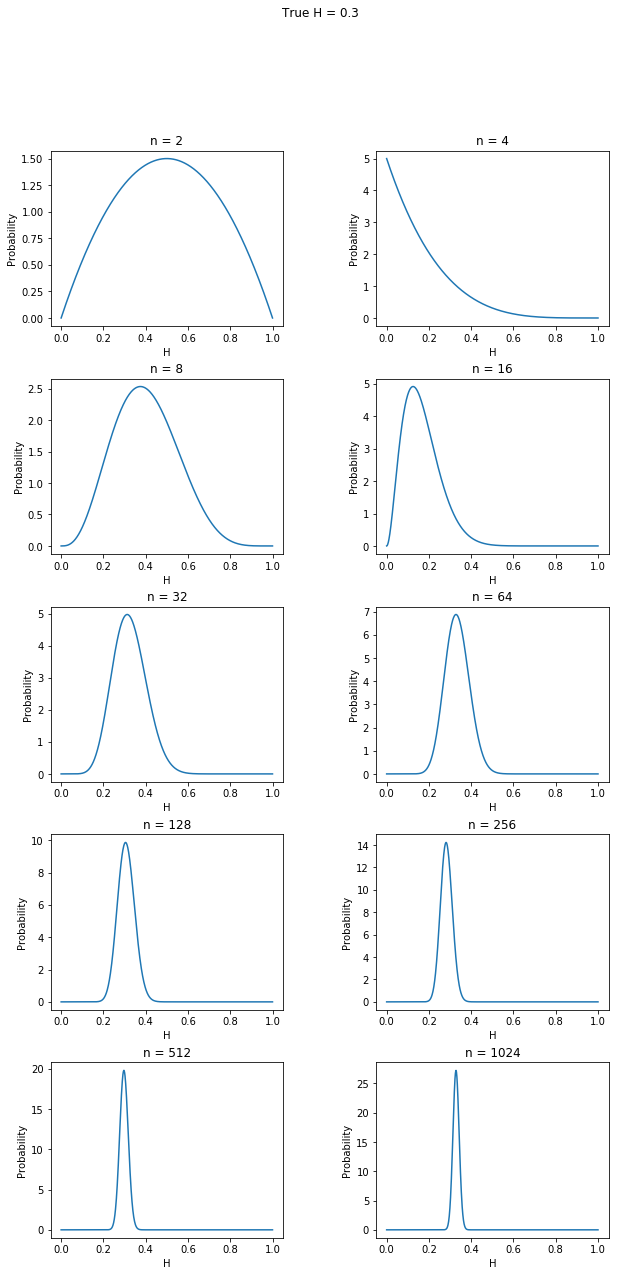

In [7]:
ucoinfig30 = plt.figure(figsize = (10,20))
ucoinfig30.subplots_adjust(hspace = 0.3, wspace = 0.4)
ucoinfig30.suptitle("True H = 0.3")

for i,x in enumerate(narray):
    prob = coinprob(x, 0.3, Harray)
    ax = ucoinfig30.add_subplot(5,2,i+1)
    ax.plot(Harray, prob)
    ax.set_xlabel("H")
    ax.set_ylabel("Probability")
    ax.set_title("n = " + str(x))

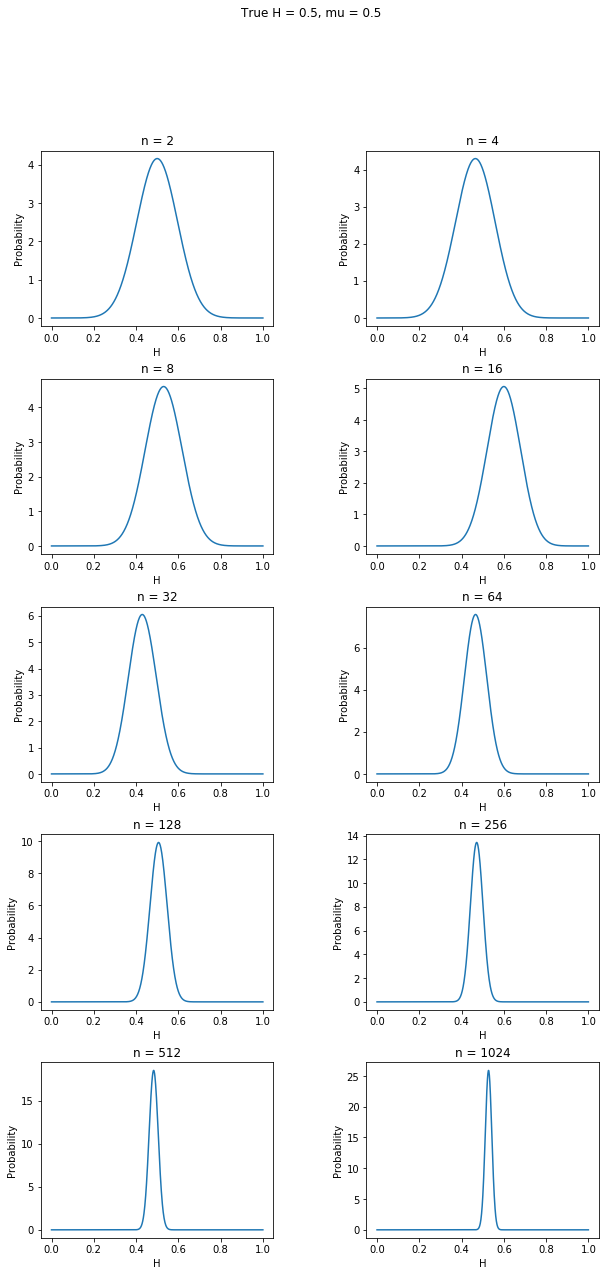

In [8]:
gcoinfig50 = plt.figure(figsize = (10,20))
gcoinfig50.subplots_adjust(hspace = 0.3, wspace = 0.4)
gcoinfig50.suptitle("True H = 0.5, mu = 0.5")

for i,x in enumerate(narray):
    prob = gcoinprob(x, 0.5, Harray, 0.5, 0.1)
    ax = gcoinfig50.add_subplot(5,2,i+1)
    ax.plot(Harray, prob)
    ax.set_xlabel("H")
    ax.set_ylabel("Probability")
    ax.set_title("n = " + str(x))

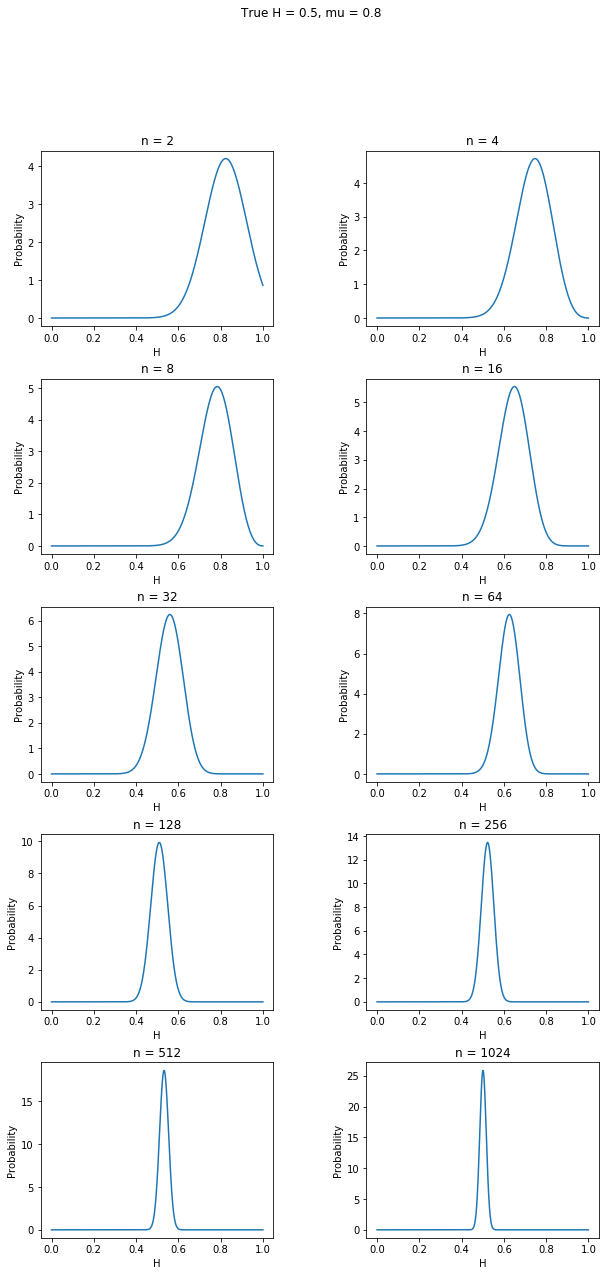

In [9]:
gcoinfig53 = plt.figure(figsize = (10,20))
gcoinfig53.subplots_adjust(hspace = 0.3, wspace = 0.4)
gcoinfig53.suptitle("True H = 0.5, mu = 0.8")

for i,x in enumerate(narray):
    prob = gcoinprob(x, 0.5, Harray, 0.8, 0.1) #sigma is 0.1, therefore we've set the H 3 sigma away from the peak
    ax = gcoinfig53.add_subplot(5,2,i+1)
    ax.plot(Harray, prob)
    ax.set_xlabel("H")
    ax.set_ylabel("Probability")
    ax.set_title("n = " + str(x))

**Assignment 4 part 2**

Using $\alpha = \beta = 1 \ km$, we can make the distribution and test it.

In [10]:
#making the random data set

def lightdata(n, trueA, trueB):
    #theta values drawn from a random uniform distribution between pi/2 and -pi/2
    thetaset = np.random.uniform(-(np.pi) / 2, np.pi / 2, n)

    #translating theta values into x values (in kilometers)
    xdif = trueB * np.tan(thetaset)
    xkset = trueA + xdif
    
    return(xkset)

Actually creating the probability distribution will be quite a lot of functions and task if we don't simplify the math first. I will be following and summarizing the source textbook's explanation of the problem.

I'm going to assume we know the lighthouse's position within +/- 3 km as that seems like a reasonable estimation for human eyes on a coastline. Further, I will assume we have set the origin of our system accordingly such that alpha will not have a magnitude greater than 3.

The probability of the individual $x_k$ given alpha and the other information is given by:

$$ prob \ ( x_k \  \vert \ \alpha, \beta, I) = \frac{ \beta }{\pi \big[ \beta^2 + (x_k - \alpha)^2 ) \big] }$$

Which can be turned into $ prob(\{ x_k \} \vert \alpha, \beta, I) $ by simply taking the product of those individual probabilities.

Turning that into the probability of alpha given $ \{ x_k \}$ and the other information for this case only involves multiplying it by a constant, given by the reciprocal of the range of coastline considered relevant for the problem (so for example, with my assumption above, the constant would be $\frac{1}{6}$).

To get something useable, we'll take the log of $prob(\alpha \vert \{ x_k \}, \beta, I)$, which will turn the product into sum and will separate off our constant that we multiplied in earlier. Therefore, the logarithm of the posterior pdf, or L, as the book calls it, will be given by:


$$ L = ln [ \ prob \ (\alpha \ \vert \ \{ x_k \}, \beta, I)] = constant + N \ ln  \ \beta  - \sum_{k=1}^N log_e \big[ \beta^2 + (x_k - \alpha )^2 \big] $$

Since we're only really interested in where the pdf is maximized, we can simply take the log beta and summation terms and look for the alpha value that maximizes that.

In [11]:
#creating the probability distribution assuming beta is known at 1 km
#also assuming we know alpha is +/- 3 km of the origin of our coordinate system


#n is number of data points
#true A and true B are just used to set the position of the lighthouse to create the x array
#A and B are the values that go into the probability equation, the estimates/true values we're finding the probability of
#data is the array of x values generated by the lightdata function

def logprob(A, B, data):

    quadratic = B**2 + (data - A)**2

    logdat = np.log(quadratic)
    
    n = len(data)
    
    summation = np.sum(logdat) * (-1)
    
    L = n * np.log(B) + summation
    
    return(L)

In [12]:
#takes in a whole A array and evaluates the L value for each, then stores in a new array
#basically creates the Y values for our plots

def LvalA(n, trueA, trueB, Aset, B):
    
    data = lightdata(n, trueA, trueB)
    
    mean = np.mean(data)
    
    Lset = np.zeros(Aset.size)
    
    for i,a in enumerate(Aset):
        
        L = logprob(a, B, data)
        
        Lset[i] = L
           
    return(Lset, mean)

Before we plot for various N values, we should examine the difference between the mean of the $x_k$ values and the estimate for the position of the lighthouse.

Text(0,0.5,'L')

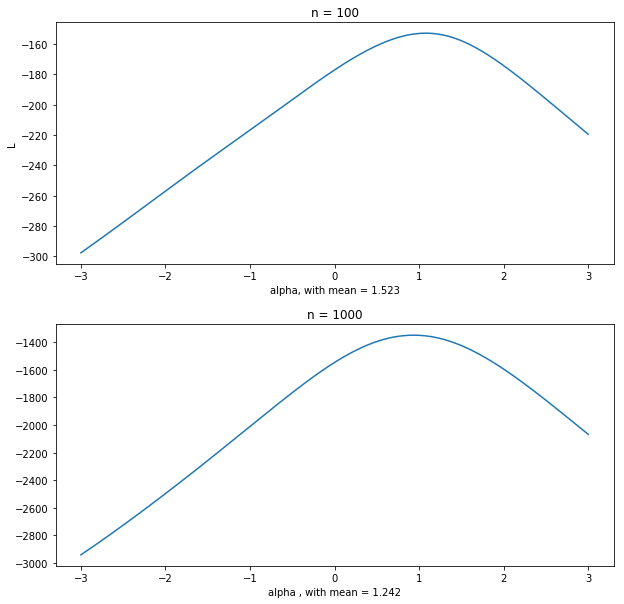

In [13]:
alphaset = np.linspace(-3.0,3.0, 1000)

logtest1,meantest1 = LvalA(100, 1, 1, alphaset, 1)
logtest2,meantest2 = LvalA(1000, 1, 1, alphaset, 1)


logtestfig = plt.figure(figsize = (10,10))
logtestfig.subplots_adjust(hspace = 0.25, wspace = 0.2)

ltax1 = logtestfig.add_subplot(2,1,1)
ltax1.plot(alphaset, logtest1)
ltax1.set_xlabel("alpha, with mean = " + str(meantest1)[0:5])
ltax1.set_ylabel("L")
ltax1.set_title("n = 100")


ltax2 = logtestfig.add_subplot(2,1,2)
ltax2.plot(alphaset, logtest2)
ltax2.set_xlabel("alpha , with mean = " + str(meantest2)[0:5])
ltax2.set_title("n = 1000")
ltax1.set_ylabel("L")

Every time the above cell is rerun, we'll see the mean change, but the max value should stay centered at about 1 km, matching the true value of alpha.

Right now, the top graph lists a mean x value of 1.654 km, and the second gives 1.404 km, neither of which match the max probability displayed by the graph. Rerunning the cell above, we get 1.146 km and 0.683 km. These still don't match very well.

The mean of these values is a bad proxy for the maximum probability value of alpha because the mean of these values doesn't actually account for the geometry or complexity of the problem. While we would expect there to be more x values clustered around the true alpha location, weighing each x value evenly by taking the mean implies that the number of points at a given position will vary linearly with the distance from the true alpha. This will cause the values further from the true alpha to be weighted more heavily than they deserve, which will skew the estimate. 

Additionally, if the range being examined is not large enough to include the vast majority of x values within the bell curve of probability, the average is going to reflect that fact by skewing the estimate towards the middle of the examined range.

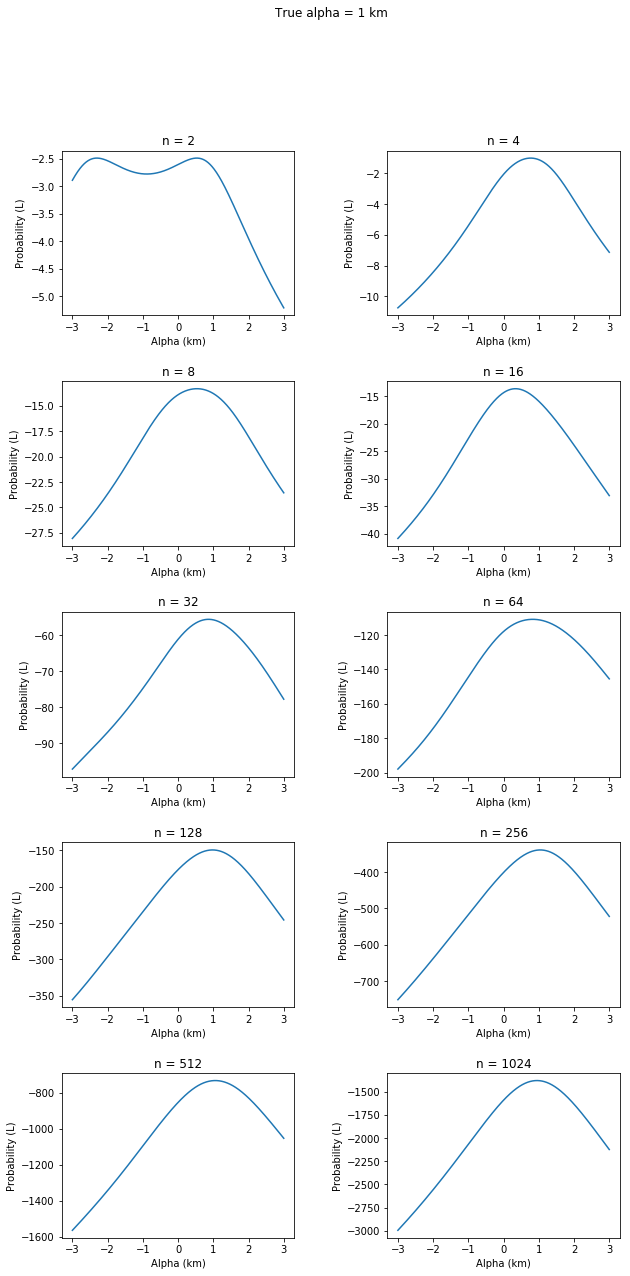

In [14]:
#now actually plotting

Lfig = plt.figure(figsize = (10,20))
Lfig.subplots_adjust(hspace = 0.4, wspace = 0.4)
Lfig.suptitle("True alpha = 1 km")

for i,n in enumerate(narray):
    L,trash = LvalA(n, 1, 1, alphaset, 1)
    ax = Lfig.add_subplot(5,2,i+1)
    ax.plot(alphaset, L)
    ax.set_xlabel("Alpha (km)")
    ax.set_ylabel("Probability (L)")
    ax.set_title("n = " + str(n))

Now we have to examine the case where we don't know beta. Luckily this shouldn't be too difficult given the way we've set up these functions so far.

In [15]:
#takes in both A and B arrays and evaluates the L value for each, then stores in a new array
#basically creates the Z values for our 3D plots

def LvalAB(n, trueA, trueB, Aset, Bset):
    
    data = lightdata(n, trueA, trueB)
    
    Lset = np.zeros((Aset.size, Bset.size))
    
    for j,b in enumerate(Bset):
        for i,a in enumerate(Aset):
        
            L = logprob(a, b, data)
        
            Lset[j,i] = L
           
    return(Lset)

I'm having a bit of trouble making the visualization super clear with where exactly that maximum is, so I tried it three different ways (using the same data set that will be saved when the cell below this is run):

First one I'm running with a color map with a high level of variation and many levels.

The second one has the levels manually set by me, based on what seemed relevant through observations of running the cell below many times.

The third one is just the default colormap and levels evenly spaced and number determined by default settings basically.

In [16]:
betaset = np.linspace(0.25,6.0,1000)

lhset = LvalAB(100, 1, 1, alphaset, betaset)
Amesh, Bmesh = np.meshgrid(alphaset,betaset)

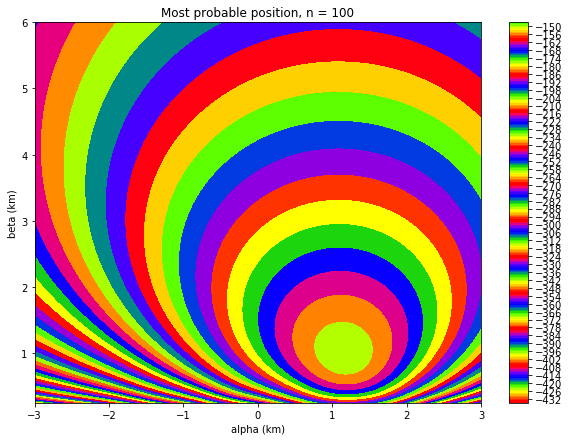

In [17]:
#lightlevels = [-450,-345,-285,-225,-190,-170,-160,-150,-145,-140,-135,-130,-125,-120,-115,-90]
#cmap = plt.get_cmap('hsv')
cmap = plt.get_cmap('prism')

lightfig = plt.figure(figsize=(10,7))
lax=lightfig.add_subplot(1,1,1)
lcp = lax.contourf(Amesh, Bmesh, lhset, 50, cmap=cmap)



lightnorm = mcol.Normalize(vmin=lcp.cvalues.min(),vmax=lcp.cvalues.max())
lsm = plt.cm.ScalarMappable(norm=lightnorm,cmap = lcp.cmap)
lsm.set_array([])
lightfig.colorbar(lsm, ticks = lcp.levels)

lax.set_title('Most probable position, n = 100')
lax.set_xlabel('alpha (km)')
lax.set_ylabel('beta (km)')

plt.show()

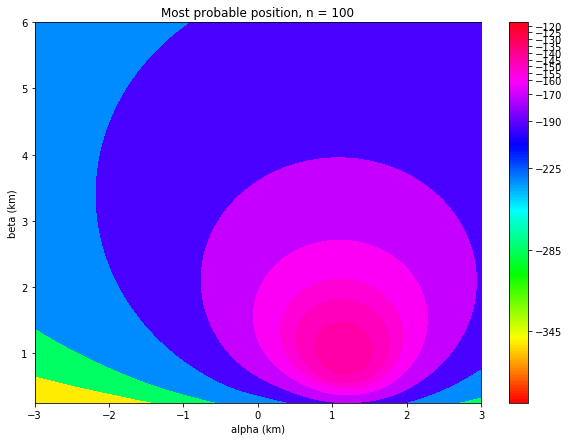

In [18]:
lightlevels = [-450,-345,-285,-225,-190,-170,-160,-155,-150,-145,-140,-135,-130,-125,-120,-115]
cmap2 = plt.get_cmap('hsv')
#cmap = plt.get_cmap('prism')

lightfig2 = plt.figure(figsize=(10,7))
lax2=lightfig2.add_subplot(1,1,1)
lcp2 = lax2.contourf(Amesh, Bmesh, lhset, lightlevels, cmap=cmap2)



lightnorm2 = mcol.Normalize(vmin=lcp2.cvalues.min(),vmax=lcp2.cvalues.max())
lsm2 = plt.cm.ScalarMappable(norm=lightnorm2,cmap = lcp2.cmap)
lsm2.set_array([])
lightfig2.colorbar(lsm2, ticks = lcp2.levels)

lax2.set_title('Most probable position, n = 100')
lax2.set_xlabel('alpha (km)')
lax2.set_ylabel('beta (km)')

plt.show()

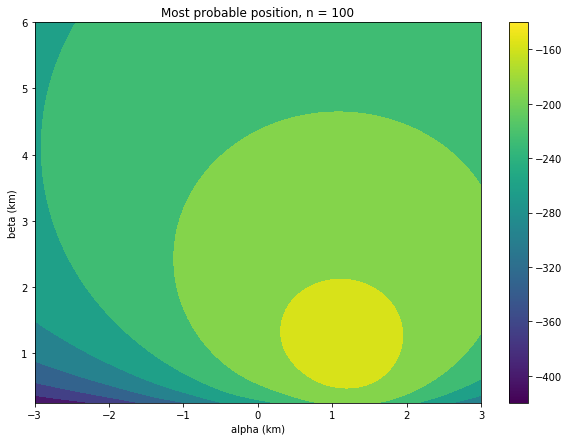

In [19]:
#lightlevels = [-450,-345,-285,-225,-190,-170,-160,-155,-150,-145,-140,-135,-130,-125,-120,-115]
#cmap2 = plt.get_cmap('hsv')
#cmap = plt.get_cmap('prism')

lightfig3 = plt.figure(figsize=(10,7))
lax3=lightfig3.add_subplot(1,1,1)
lcp3 = lax3.contourf(Amesh, Bmesh, lhset)

lightnorm3 = mcol.Normalize(vmin=lcp3.cvalues.min(),vmax=lcp3.cvalues.max())
lsm3 = plt.cm.ScalarMappable(norm=lightnorm3,cmap = lcp3.cmap)
lsm3.set_array([])
lightfig3.colorbar(lsm3, ticks = lcp3.levels)

lax3.set_title('Most probable position, n = 100')
lax3.set_xlabel('alpha (km)')
lax3.set_ylabel('beta (km)')

plt.show()